Import All the Libraries

In [375]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [376]:
df = pd.read_csv(r"C:\Projects\ICT_Assignments\FinalProject\main_project-bank-full.csv")
df_unchanged = df
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [377]:
df.shape[0]

45211

In [378]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      14
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome     10
Target        0
dtype: int64

In [379]:
df.isnull().mean()

age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000310
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000221
Target       0.000000
dtype: float64

In [380]:
# Examples of contact.
df['contact'].unique()

array(['unknown', nan, 'cellular', 'telephone'], dtype=object)

In [381]:
df['poutcome'].unique()

array(['unknown', nan, 'failure', 'other', 'success'], dtype=object)

In [382]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [383]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

More InSights

In [384]:
# bucket boundaries
buckets = [0, 20, 40, 60, 1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df['Age_buckets_labels'] = pd.cut(
    df['age'], bins=buckets, labels=labels, include_lowest=True)

df['Age_buckets'] = pd.cut(df['age'], bins=buckets, include_lowest=True)
df['loan'] = np.where(df['loan'] =='yes', 1, 0)

df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = np.where(df['housing'] =='yes', 1, 0)
df['marital'] = np.where(df['marital'] =='married', 0,np.where(df['marital'] =='single', 1,np.where(df['marital'] =='divorced', 2, -1)))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
0,58,management,0,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
1,44,technician,1,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
2,33,entrepreneur,0,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]"
3,47,blue-collar,0,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
4,33,unknown,1,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]"


In [385]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
45206,51,technician,0,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes,40-60,"(40.0, 60.0]"
45207,71,retired,2,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes,>60,"(60.0, 1000.0]"
45208,72,retired,0,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes,>60,"(60.0, 1000.0]"
45209,57,blue-collar,0,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no,40-60,"(40.0, 60.0]"
45210,37,entrepreneur,0,secondary,0,2971,0,0,cellular,17,nov,361,2,188,11,other,no,20-40,"(20.0, 40.0]"


In [386]:
df.groupby('Age_buckets_labels')['age'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: age, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

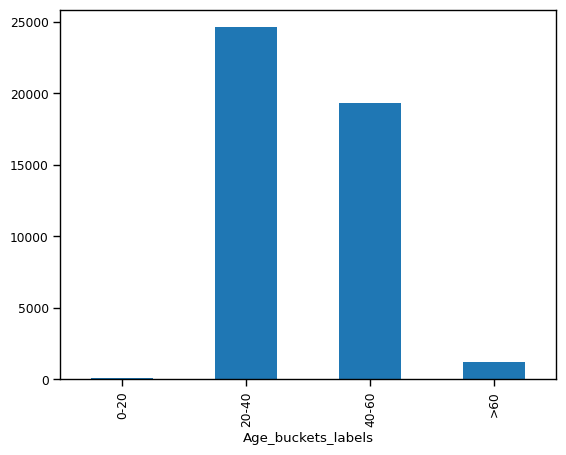

In [387]:
df.groupby('Age_buckets_labels')['age'].count().plot.bar()

First Insight- Maximum number of rows in the Dataset comes between 20-40 age 

In [388]:
df.groupby('loan')['Age_buckets_labels'].count()

loan
0    37967
1     7244
Name: Age_buckets_labels, dtype: int64

<AxesSubplot: xlabel='loan'>

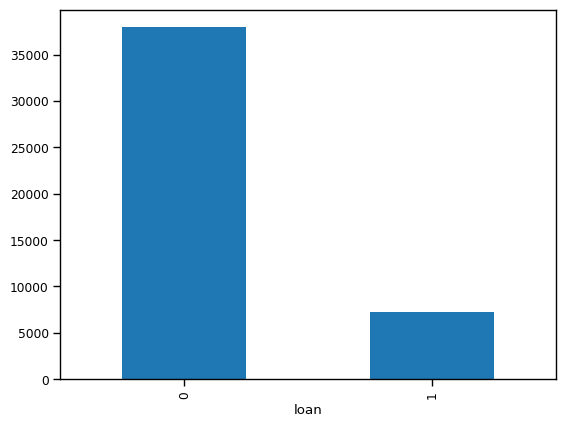

In [389]:
df.groupby('loan')['Age_buckets_labels'].count().plot.bar()

In [390]:
df.groupby('Age_buckets_labels')['housing'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: housing, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

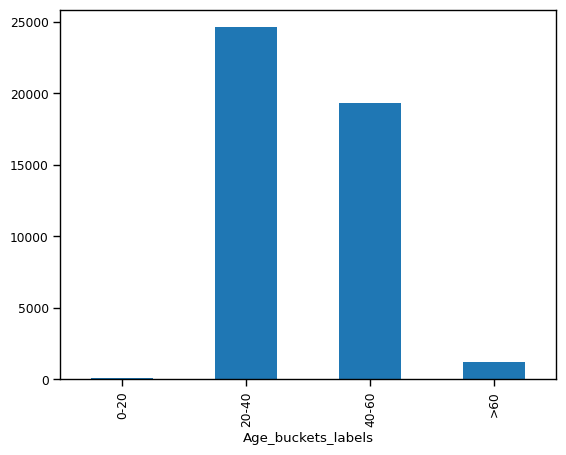

In [391]:
df.groupby('Age_buckets_labels')['housing'].count().plot.bar()

In [392]:
df.groupby('job')['housing'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: housing, dtype: int64

<AxesSubplot: xlabel='job'>

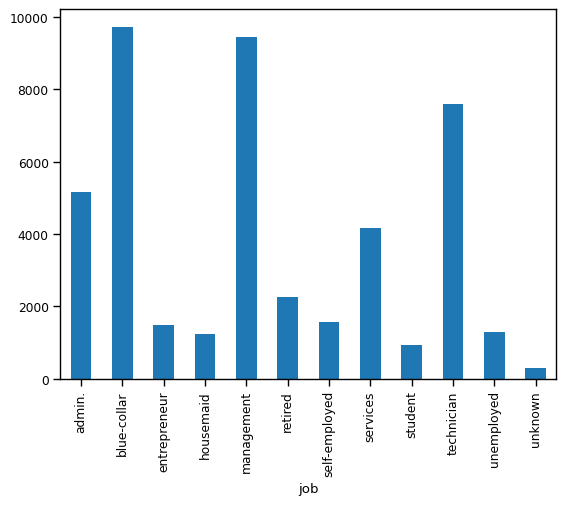

In [393]:
df.groupby('job')['housing'].count().plot.bar()

In [394]:
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

<AxesSubplot: xlabel='job'>

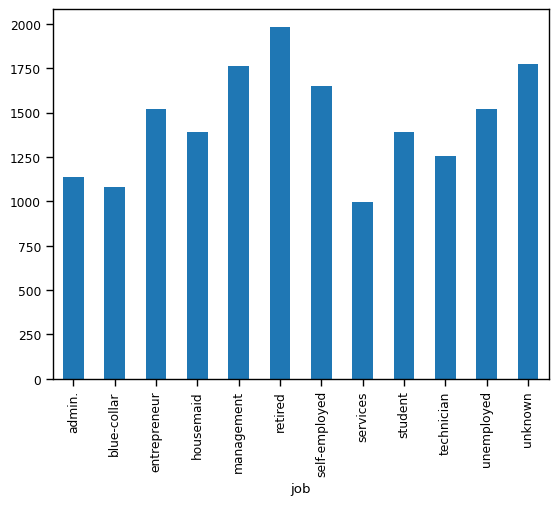

In [395]:
df.groupby('job')['balance'].mean().plot.bar()

<AxesSubplot: >

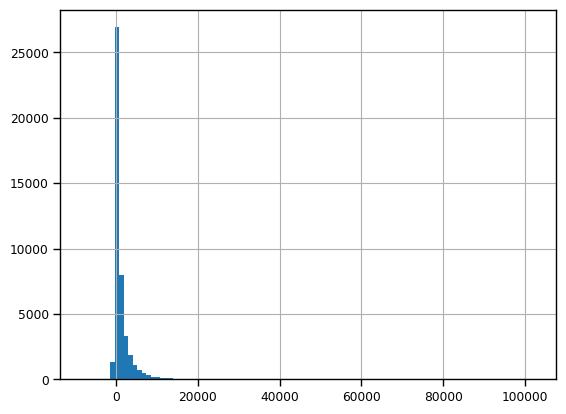

In [396]:
df['balance'].hist(bins=100)

<AxesSubplot: >

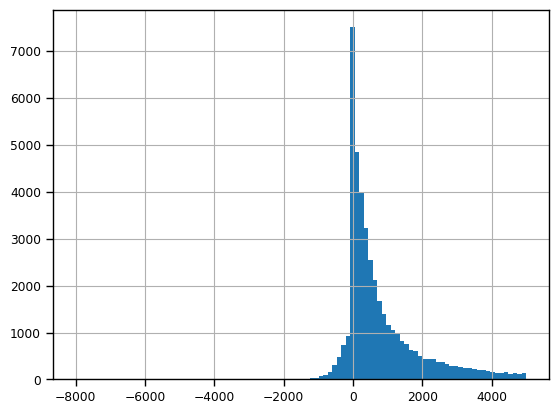

In [397]:
# and now let's look at the lower balance in more detail

df[df['balance']<5000]['balance'].hist(bins=100)

<AxesSubplot: >

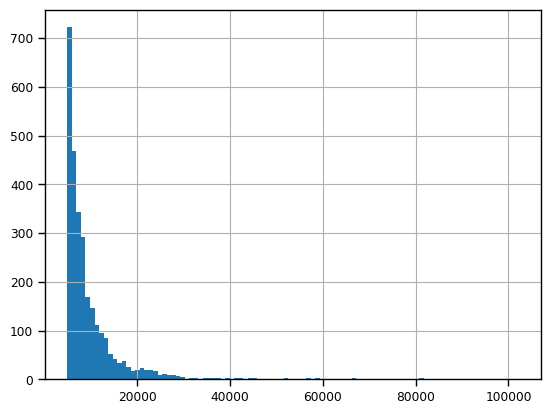

In [398]:
df[df['balance']>5000]['balance'].hist(bins=100)

In [399]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [-10000,0, 5000, 10000, 15000, 20000,150000]

# bucket labels
labels = ['<0','0-5k', '5-10k', '10-15k', '15-20k', '>20k']

# discretisation
df['balance_buckets'] = pd.cut(
    df['balance'], bins=buckets, labels=labels, include_lowest=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
0,58,management,0,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
1,44,technician,1,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
2,33,entrepreneur,0,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]",0-5k
3,47,blue-collar,0,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
4,33,unknown,1,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]",0-5k


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<0'),
  Text(1, 0, '0-5k'),
  Text(2, 0, '5-10k'),
  Text(3, 0, '10-15k'),
  Text(4, 0, '15-20k'),
  Text(5, 0, '>20k')])

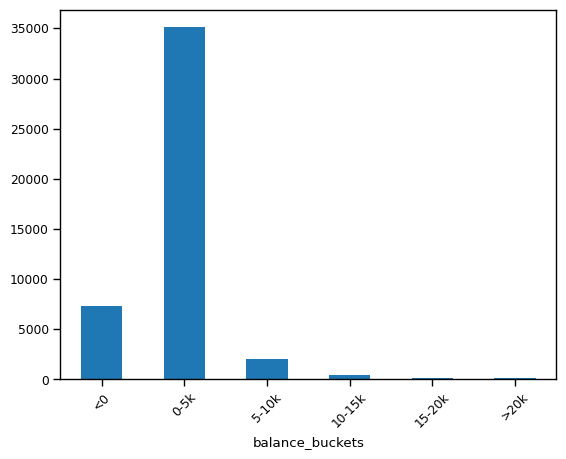

In [400]:
df.groupby(['balance_buckets'])['balance'].count().plot.bar()
plt.xticks(rotation=45)

In [401]:
df.groupby(['balance_buckets'])['balance'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: balance, dtype: int64

In [402]:
df.groupby(['balance_buckets'])['default'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: default, dtype: int64

In [403]:
df.groupby(['marital']).count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
marital,,,,,,,,,,,,,,,,,,,
0,27214,27214,27214,27214,27214,27214,27214,27204,27214,27214,27214,27214,27214,27214,27209,27214,27214,27214,27214
1,12790,12790,12790,12790,12790,12790,12790,12787,12790,12790,12790,12790,12790,12790,12786,12790,12790,12790,12790
2,5207,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207


<AxesSubplot: xlabel='marital'>

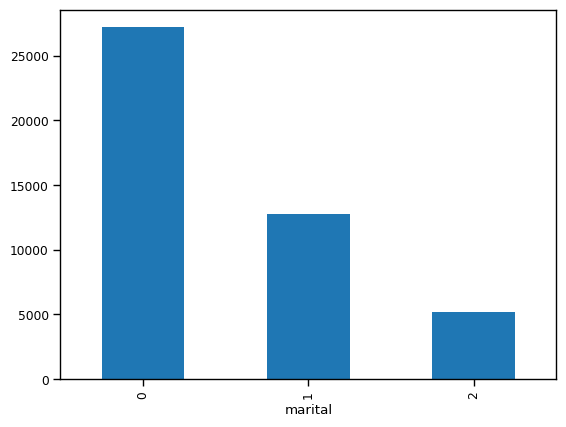

In [404]:
df.groupby(['marital'])['balance'].count().plot.bar()

## Plot pie chart  for SubScribe / NOT

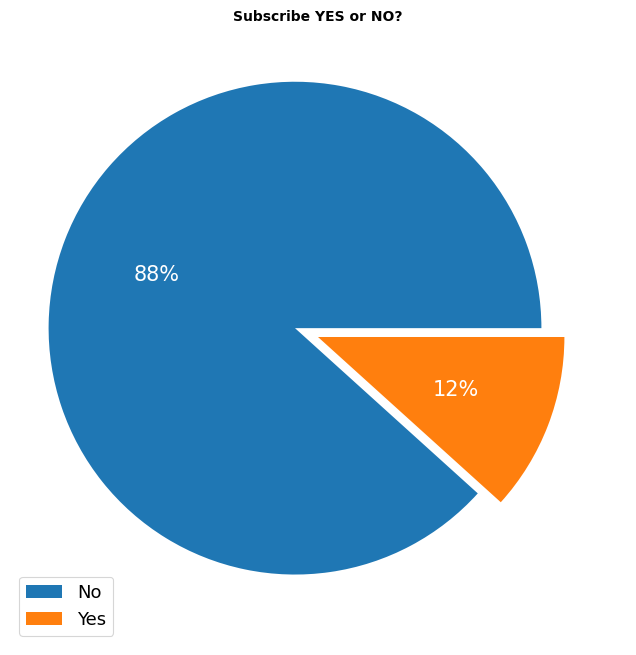

In [405]:
plt.figure(figsize=(8,8))
plt.title("Subscribe YES or NO?", size=10, fontweight='bold')
plt.pie(df['Target'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

<AxesSubplot: xlabel='balance', ylabel='Target'>

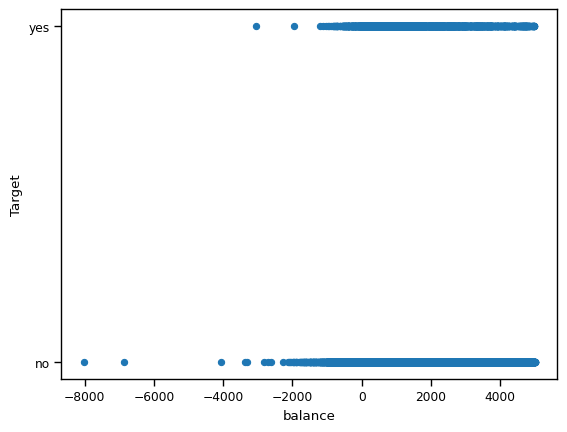

In [406]:


df[df['balance'] < 5000].plot.scatter(x='balance', y='Target')

In [407]:
df['Target'] = np.where(df['Target'] =='yes', 1, 0)
df.describe()


,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.513238,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.692948,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


#Numerical Figures Correlation

In [408]:
df[['age','balance','day','duration','pdays','previous']].corr()

,age,balance,day,duration,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.001565,0.001203
pdays,-0.023758,0.003435,-0.093044,-0.001565,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,0.454820,1.000000


<AxesSubplot: >

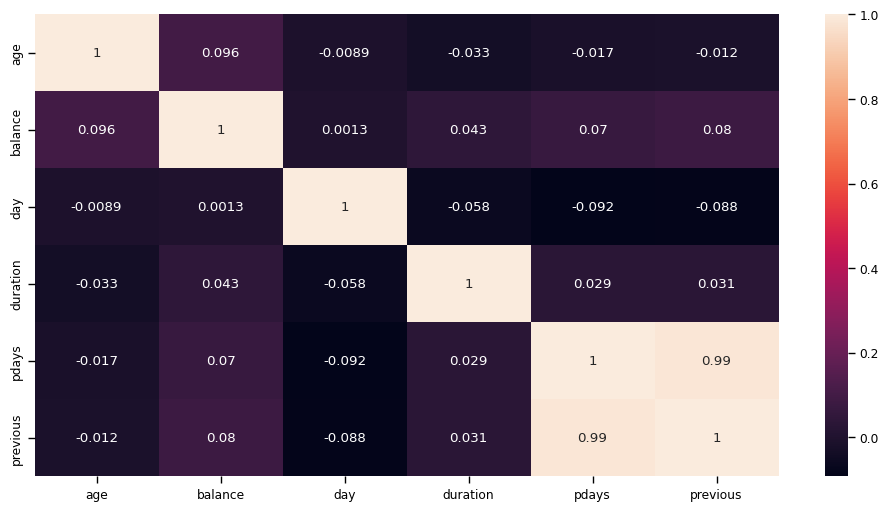

In [409]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['age','balance','day','duration','pdays','previous']].corr('spearman'), annot=True)

Categorical Figures Correlation

In [410]:
df_unchanged[['job','marital','education','default','housing','loan','Target']].corr()

C:\Users\insre\AppData\Local\Temp\ipykernel_11528\3231632338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_unchanged[['job','marital','education','default','housing','loan','Target']].corr()


,marital,default,housing,loan,Target
marital,1.000000,0.018404,-0.011671,-0.018526,0.043846
default,0.018404,1.000000,-0.006025,0.077234,-0.022419
housing,-0.011671,-0.006025,1.000000,0.041323,-0.139173
loan,-0.018526,0.077234,0.041323,1.000000,-0.068185
Target,0.043846,-0.022419,-0.139173,-0.068185,1.000000


C:\Users\insre\AppData\Local\Temp\ipykernel_11528\4095890657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_unchanged[['job','marital','education','default','housing','loan','Target']].corr('spearman'), annot=True)


<AxesSubplot: >

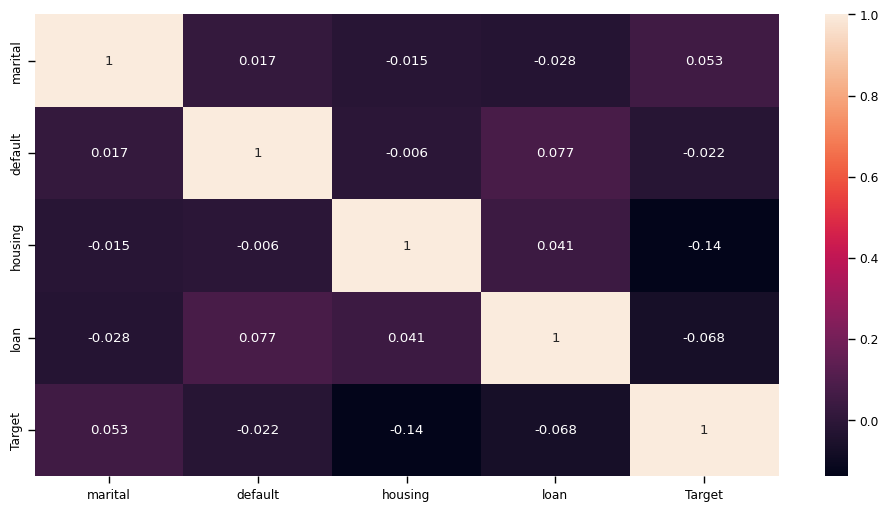

In [411]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_unchanged[['job','marital','education','default','housing','loan','Target']].corr('spearman'), annot=True)

<AxesSubplot: xlabel='Target', ylabel='count'>

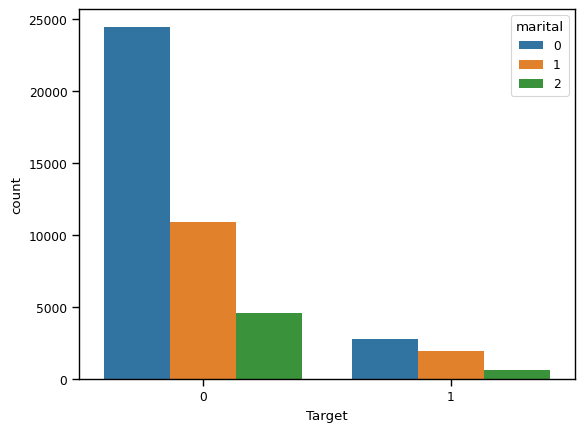

In [412]:
sns.countplot(data= df, x='Target', hue='marital')

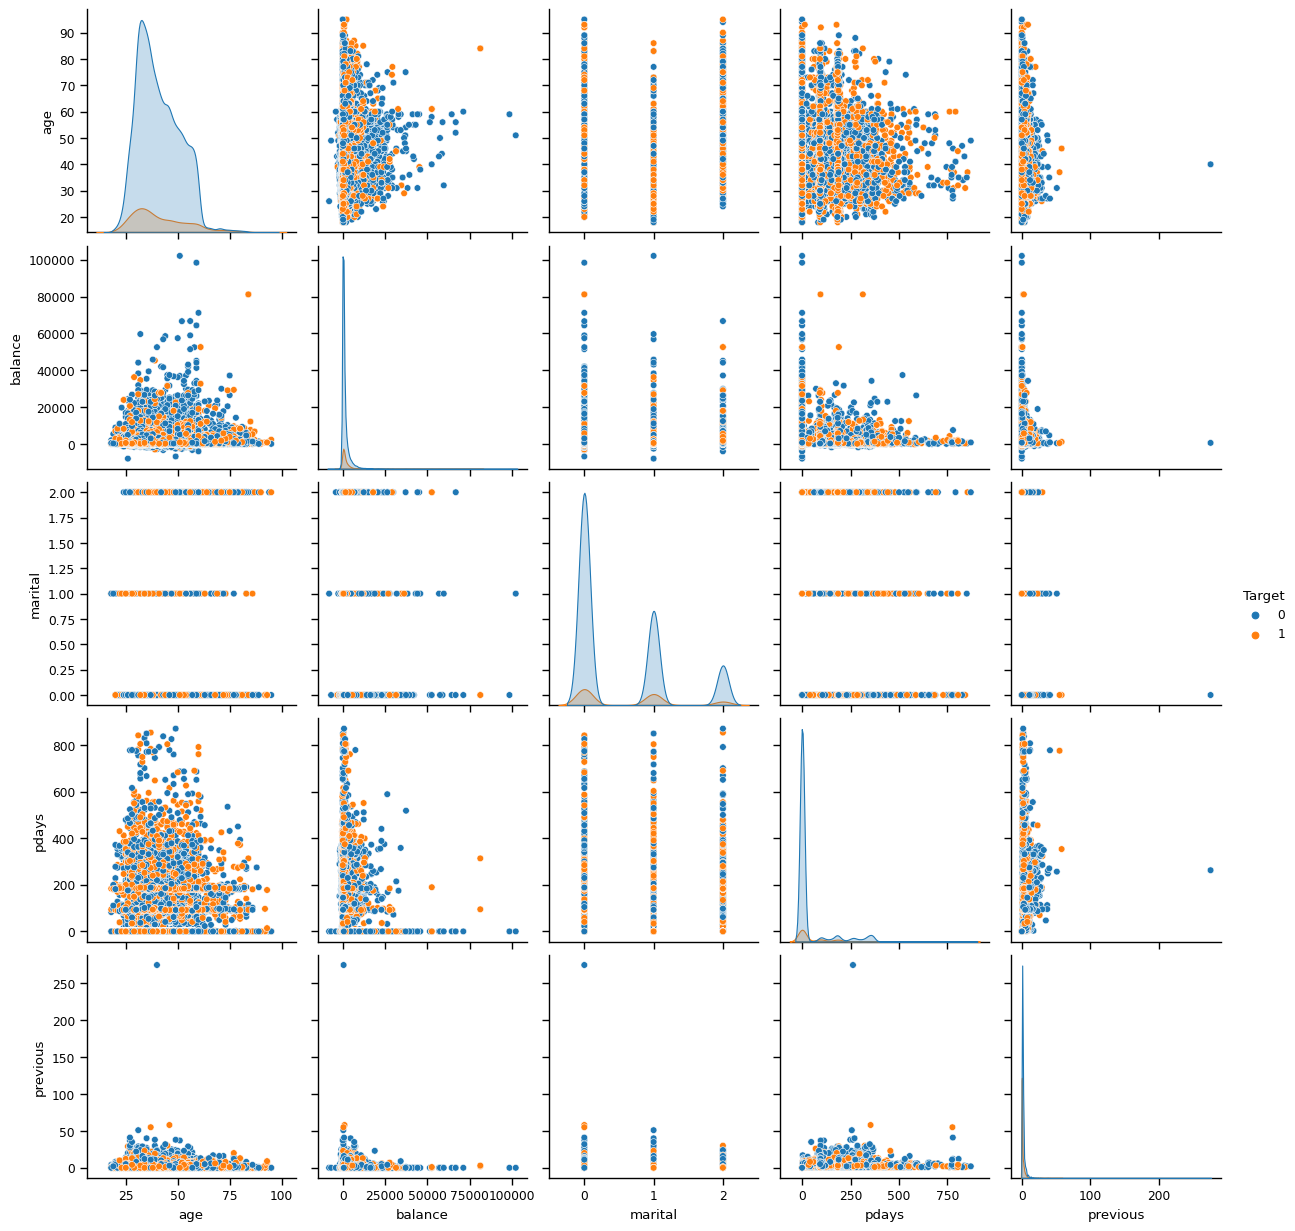

In [413]:
sns.pairplot(data= df[['age','balance','marital','pdays', 'previous','Target']], hue='Target')

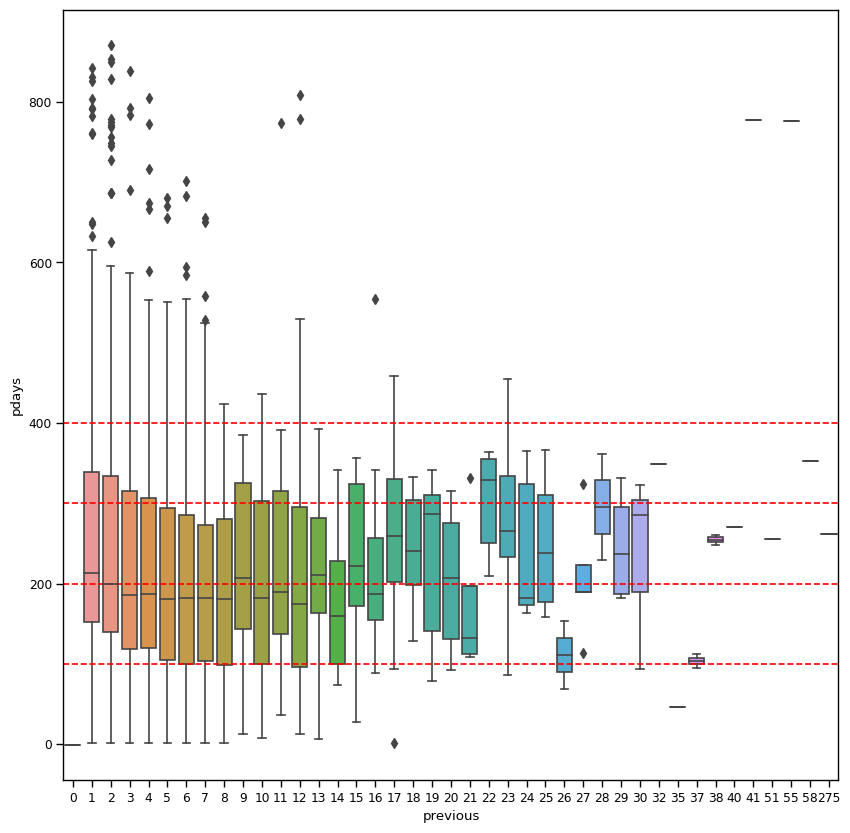

In [414]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['pdays'],
            x=df['previous'])
reference = [100, 200, 300, 400]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

More Visualization

In [415]:
def counts_plot(y_var, col="w", ax=None):
    y_var_counts = (
        df.loc[:, y_var]
        .value_counts()
        .reset_index()
        .rename(columns={"index": y_var, y_var: "counts"})
        .assign(
            percent=lambda df_: (df_["counts"] / df_["counts"].sum()).round(2) * 100
        )
    )
    sns.set_context("paper")
    ax0 = sns.barplot(
        data=y_var_counts,
        x="percent",
        y=y_var,
        color=col,
        ax=ax,
        order=y_var_counts[y_var],
    )
    values1 = ax0.containers[0].datavalues
    labels = ["{:g}%".format(val) for val in values1]
    ax0.bar_label(ax0.containers[0], labels=labels, fontsize=9, color="#740405")
    ax0.set_ylabel("")
    ax0.set_xlabel("Percent", fontsize=10)
    ax0.set_title(str.title(y_var) + " | proportions ", fontsize=10)
    return

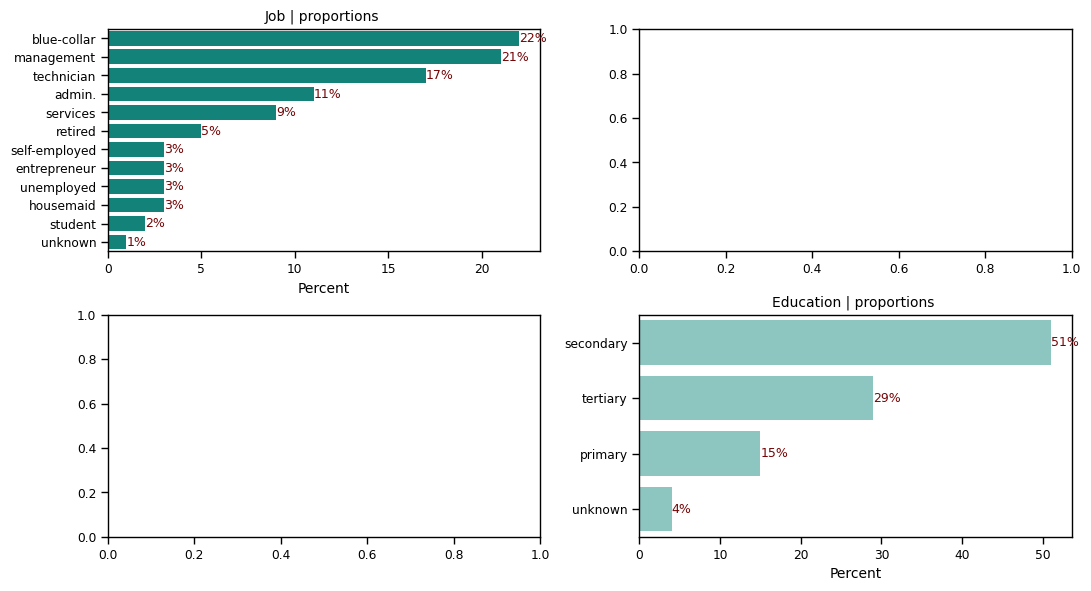

In [416]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(11, 6))
counts_plot("job", ax=ax1, col="#009688")
#counts_plot("housing", ax=ax2, col="#35a79c")
#counts_plot("marital", ax=ax3, col="#54b2a9")
counts_plot("education", ax=ax4, col="#83d0c9")
fig.tight_layout()
plt.show()

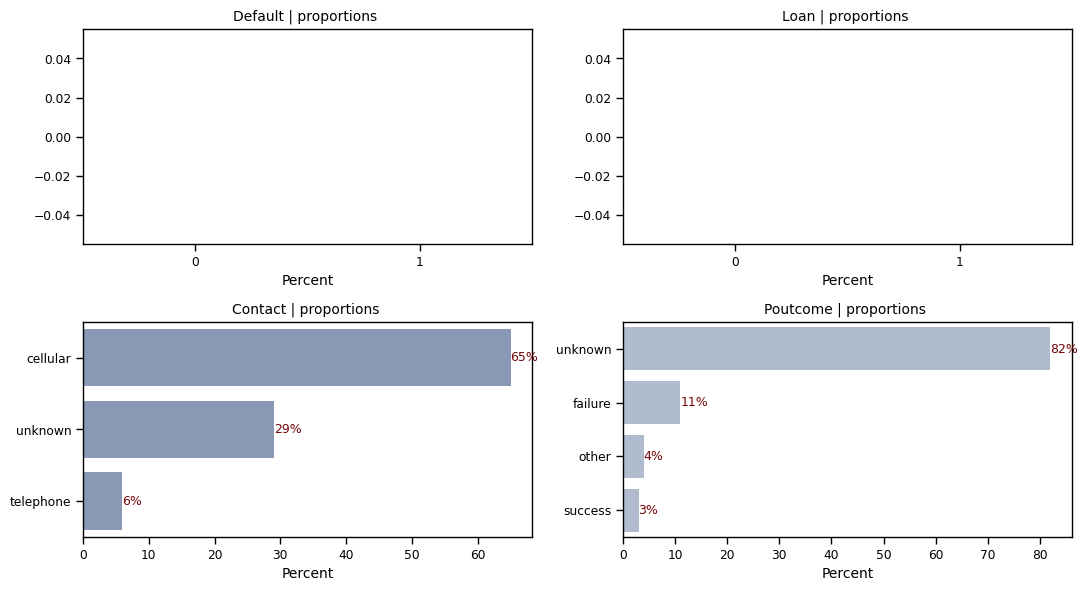

In [417]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("default", ax=ax1, col="#2e5090")
counts_plot("loan", ax=ax2, col="#5873a6")
counts_plot("contact", ax=ax3, col="#8296bc")
counts_plot("poutcome", ax=ax4, col="#abb9d3")
fig.tight_layout()
plt.show()

In [418]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'Age_buckets_labels', 'Age_buckets',
       'balance_buckets'],
      dtype='object')

In [419]:
df = df.drop(columns=['Age_buckets_labels', 'Age_buckets','balance_buckets'], axis=1)
df.shape

(45211, 17)

**Balancing DataSet via Under Sampling**

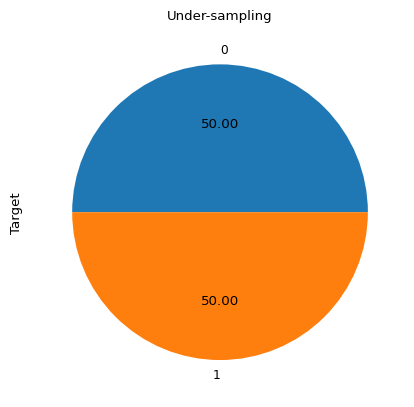

In [420]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['Target'], axis=1)
y = df['Target']
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [421]:
y_res.value_counts()


0    5289
1    5289
Name: Target, dtype: int64

***Over Sampling**

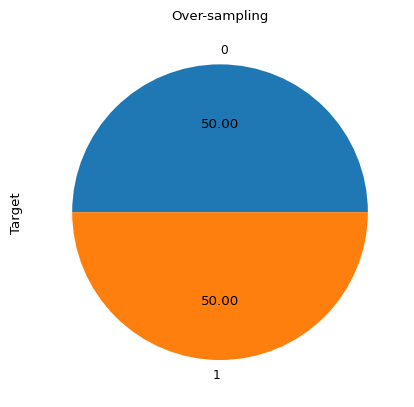

In [422]:

from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
     

In [423]:
y_res.value_counts()

0    39922
1    39922
Name: Target, dtype: int64

In [424]:
df.dtypes

age           int64
job          object
marital       int32
education    object
default       int64
balance       int64
housing       int32
loan          int32
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int32
dtype: object

In [450]:
df1=df.fillna(method='pad')

In [451]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [452]:
df1['job'].unique()



array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [453]:
df1['job'] = df1['job'].replace({'management' :1, 'technician' :2, 'entrepreneur':3,
                             'blue-collar' :4, 'retired' :5, 'admin.':6,
                             'services' :7, 'self-employed' :8, 'unemployed' :9,
                             'housemaid':10, 'student':11, 'unknown':-1
                             })

In [429]:
df1['job'].unique()

array([ 1,  2,  3,  4, -1,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [454]:
df1['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [455]:
df1['education'] = df1['education'].replace({'tertiary' :1, 'secondary' :2, 'primary':3,
                       'unknown':-1})

In [432]:
df1['education'].unique()

array([ 1,  2, -1,  3], dtype=int64)

In [456]:
df1['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [457]:
df1['contact'] = df1['contact'].replace({'cellular' :1, 'telephone' :2,
                       'unknown':-1})

In [435]:
df1['contact'].unique()

array([-1,  1,  2], dtype=int64)

In [436]:
df1['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [458]:
df1['month'] = df1['month'].replace({'jan' :1, 'feb' :2, 'mar':3,
                             'apr' :4, 'may' :5, 'jun':6,
                             'jul' :7, 'aug' :8, 'sep' :9,
                             'oct':10, 'nov':11, 'dec':12
                             })

In [459]:
df1['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [460]:
df1['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [461]:
df1['poutcome'] = df1['poutcome'].replace({'failure' :1, 'other' :2,'success' :3,
                       'unknown':-1})

In [462]:
df1['poutcome'].unique()

array([-1,  1,  2,  3], dtype=int64)

In [463]:
from imblearn.under_sampling import RandomUnderSampler
X = df1.drop(['Target'], axis=1)
y = df1['Target']

In [464]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**SMOTE**

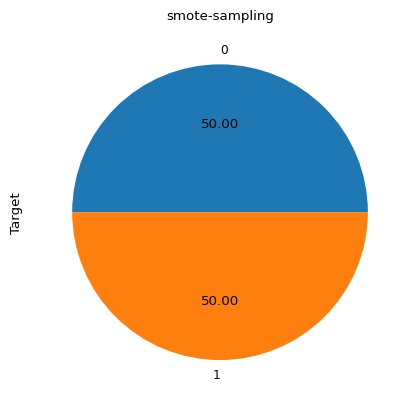

In [467]:
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

ax = y_sm.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("smote-sampling")

In [468]:
y_sm.value_counts()

0    39922
1    39922
Name: Target, dtype: int64